# QuantStock: Performance Analytics and Benchmarking System

## Introduction:
The QuantStock Performance Analytics and Benchmarking System is designed to evaluate and benchmark the performance of individual stocks in the S&P 500 index. By leveraging historical price data, this system calculates key financial metrics such as Sharpe Ratio, Volatility, and Cumulative Returns to help investors and analysts assess stock performance relative to market benchmarks.

Project Description:
QuantStock allows users to analyze the historical performance of selected stocks, compare them to a market benchmark (e.g., an average of S&P 500 stock prices), and visualize the results over time. By incorporating daily return calculations and advanced financial metrics, it provides meaningful insights into the risk-adjusted performance of individual stocks, helping inform investment strategies.

The system includes:

Daily Stock Return Calculations: Measures daily percentage changes in stock prices.
Benchmark Comparison: Compares the stock’s performance to an average benchmark of all S&P 500 stocks.
Cumulative Returns: Calculates cumulative returns to visualize long-term performance.
Financial Metrics: Computes Sharpe Ratio, Volatility, and other key metrics to evaluate risk-adjusted returns.
Automated Reporting: Generates a detailed performance report in PDF format, summarizing key insights and metrics.

In [12]:
# install dependencies
! pip install -r /home/vic3/github/QuantFund_Project/requirements.txt

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fpdf import FPDF
from datetime import datetime

In [17]:
# Load the Dataset
data = pd.read_csv('/home/vic3/github/QuantFund_Project/data/all_stocks_5yr.csv', parse_dates=['date'], index_col='date')


# Preview the Data
print(data.head())


             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [18]:
# Filter stock data (e.g., Apple - 'AAPL')
stock_data = data[data['Name'] == 'AAPL'].copy()

# Calculate daily returns based on the 'close' price
stock_data['Stock_Return'] = stock_data['close'].pct_change()

# Simulate a benchmark (e.g., average of all stock returns)
# Group by date and calculate the average close price as a simple benchmark
benchmark_data = data.groupby('date').mean(numeric_only=True)
benchmark_data['Benchmark_Return'] = benchmark_data['close'].pct_change()

# Merge the stock and benchmark data for comparison
merged_data = pd.merge(stock_data[['Stock_Return']], benchmark_data[['Benchmark_Return']], left_index=True, right_index=True, how='inner')

# Drop any remaining missing values after the merge
merged_data = merged_data.dropna()

# Preview the merged data
print(merged_data.head())

            Stock_Return  Benchmark_Return
date                                      
2013-02-11      0.010422         -0.001653
2013-02-12     -0.025067          0.002263
2013-02-13     -0.001903          0.001394
2013-02-14     -0.000899         -0.000211
2013-02-15     -0.013780         -0.000615


### Calculating Cumulative Returns for both the stock and the benchmark

In [20]:
# Calculate cumulative returns for both the stock and the benchmark
merged_data['Cumulative_Stock_Return'] = (1 + merged_data['Stock_Return']).cumprod() - 1
merged_data['Cumulative_Benchmark_Return'] = (1 + merged_data['Benchmark_Return']).cumprod() - 1

### Cumulative returns for visualization

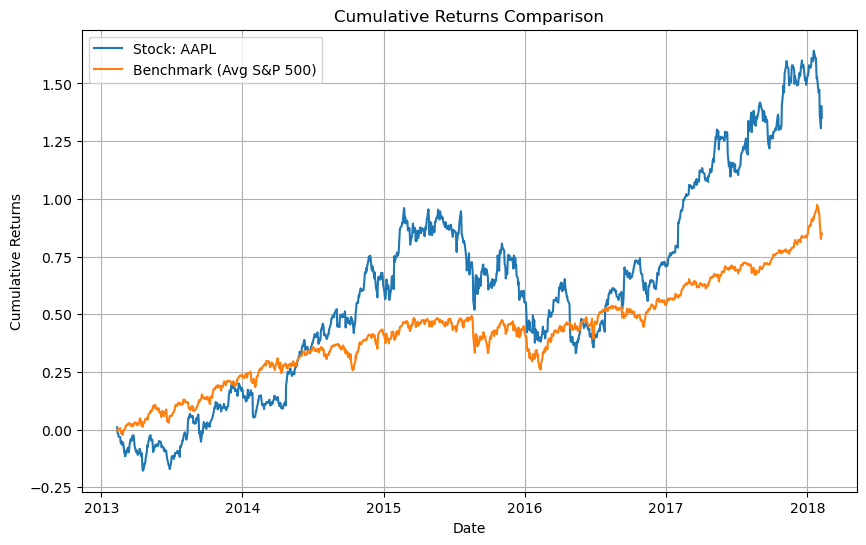

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['Cumulative_Stock_Return'], label='Stock: AAPL')
plt.plot(merged_data.index, merged_data['Cumulative_Benchmark_Return'], label='Benchmark (Avg S&P 500)')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

### Financial metrics (Sharpe Ratio, Volatility)

#### Sharpe Ratios

In [22]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    # Annualized Sharpe ratio
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * (excess_returns.mean() / returns.std())

In [26]:
# Calculate Sharpe Ratios for stock and benchmark
stock_sharpe_ratio = calculate_sharpe_ratio(merged_data['Stock_Return'])
benchmark_sharpe_ratio = calculate_sharpe_ratio(merged_data['Benchmark_Return'])
print(f"Sharpe Ratio (Stock: AAPL): {stock_sharpe_ratio:.2f}")
print(f"Sharpe Ratio (Benchmark): {benchmark_sharpe_ratio:.2f}")

Sharpe Ratio (Stock: AAPL): 0.81
Sharpe Ratio (Benchmark): 0.97


#### Annualized volatility

In [27]:
stock_volatility = merged_data['Stock_Return'].std() * np.sqrt(252)
benchmark_volatility = merged_data['Benchmark_Return'].std() * np.sqrt(252)
print(f"Annualized Volatility (Stock: AAPL): {stock_volatility:.2%}")
print(f"Annualized Volatility (Benchmark): {benchmark_volatility:.2%}")

Annualized Volatility (Stock: AAPL): 23.17%
Annualized Volatility (Benchmark): 12.49%


### Save The Data as CSV

In [28]:
# Dictionary containing the calculated metrics
calculated_metrics = {
    'stock_name': ['AAPL'],  # Stock name
    'sharpe_ratio': [stock_sharpe_ratio],
    'volatility': [stock_volatility],
    'benchmark_sharpe': [benchmark_sharpe_ratio],
    'benchmark_volatility': [benchmark_volatility]
}

# Convert to a DataFrame
metrics_df = pd.DataFrame(calculated_metrics)

# Save the DataFrame to a CSV file
metrics_df.to_csv('../data/calculated_metrics.csv', index=False)